In [724]:
#Plotting the Haar function

In [725]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2


In [726]:
#Deffinng our peicewise function
def f(x, scf, shft):
 if(0-shft<= x*scf < .5-shft): return 1
 elif(.5-shft<= x*scf <1-shft): return -1
 else: return 0

In [727]:
#Setting up our range of time values for N length, twice that and 4 times that
N = 512
x = np.linspace(-2, 2., N)
x_2= np.linspace(-2, 2., 2*N)
x_4= np.linspace(-2, 2., 4* N)

In [728]:
y = []
for i in range(len(x)):
   y.append(f(x[i], 1, 0))
y_2 = []
for i in range(len(x_2)):
   y_2.append(f(x_2[i], 1, 0))
y_4 = []
for i in range(len(x_4)):
   y_4.append(f(x_4[i], 1, 0))

y= np.array(y)
y_2= np.array(y_2)
y_4= np.array(y_4)

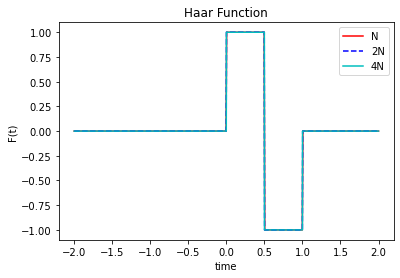

In [729]:
plt.plot(x,y, color= "r", label= "N")
plt.plot(x_2,y_2, color= "b",ls = "--", label= "2N")
plt.plot(x_4,y_4, color= "c",ls = "-", label= "4N")
plt.legend()
plt.xlabel("time")
plt.ylabel("F(t)")
plt.title("Haar Function")
plt.show()

In [730]:
#the function is coinsiding for each of the arrangement

In [731]:
# The number of points we used are multiples of 512, which is a power of 2, so that the  convergence of the Fourier Transformation will process efficently

In [732]:
#Part B------------------------------

In [733]:
#Numpy's FFT package to find the intensity at certain frequency

In [734]:
FFT_x = np.fft.fft(y)
FFT_x2 = np.fft.fft(y_2)
FFT_x4 = np.fft.fft(y_4)

In [735]:
#To find frequency
f_x = np.fft.fftfreq(N)
f_x2 = np.fft.fftfreq(2*N)
f_x4= np.fft.fftfreq(4*N)

In [736]:
#Plotting frequency's

C:\Users\18457\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\18457\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\18457\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


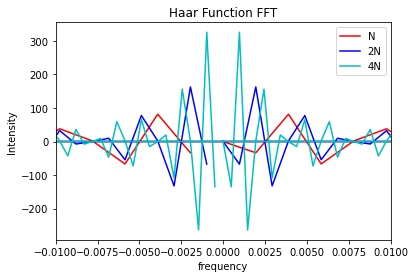

In [737]:
plt.plot(f_x,FFT_x, color= "r", label= "N")
plt.plot(f_x2,FFT_x2, color= "b", label= "2N")
plt.plot(f_x4,FFT_x4, color= "c", ls = "-", label= "4N") 
plt.xlim(-.01,.01)
plt.xlabel("frequency")
plt.ylabel("Intensity")
plt.title("Haar Function FFT")
plt.legend()
plt.show()

In [738]:
#Normalize our FT
FFT_xNM = abs(FFT_x)/N
FFT_x2NM = abs(FFT_x2)/2*N
FFT_x4NM = abs(FFT_x4)/4*N

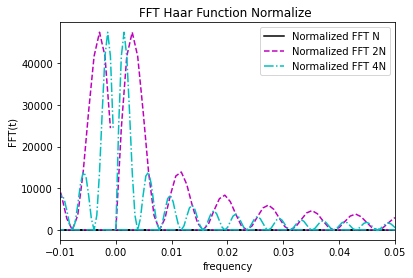

In [739]:
plt.plot(f_x,FFT_xNM, color= "k", label= "Normalized FFT N")
plt.plot(f_x2,FFT_x2NM, color= "m",ls="--", label= "Normalized FFT 2N")
plt.plot(f_x4,FFT_x4NM, color= "c", ls = "-.", label= "Normalized FFT 4N") 
plt.xlim(-.01,.05)
plt.xlabel("frequency")
plt.ylabel("FFT(t)")
plt.title("FFT Haar Function Normalize ")
plt.legend()
plt.show()

In [740]:
#Error Anaylasis

In [741]:
#Here we are taking averages of the y values of our FFT of Haar corresponding to the lengths N, 2*N
# and 4*N. We place them into an absolute value function to avoid our positives and negatives canceling
#eachother out. By comparing the values we see that the Y values get more precise as we increase the number 
#of data points. The the y coordinates are around the same number as the length of x= N*4 ans N*2, so it is
#is more precise by a factor of aprox 3.
Y=abs(sum(FFT_x)/(len(FFT_x)))
Y2=abs(sum(FFT_x2)/(len(FFT_x2)))
Y4=abs(sum(FFT_x4)/(len(FFT_x4)))

print(Y4/Y)
print(Y2/Y)
print(Y/Y)


2.91547594742265
2.5495097567963922
1.0


In [742]:
#Part C---------------------

In [743]:
#Time shifting doesnt change the FFT, the fft doesn't rely on location in time. It only moves the the function over

In [744]:
#Time Shifting
tshf_val= 2
y_tsh = []
for i in range(len(x)):
   y_tsh.append(f(x[i],1, tshf_val))
y_tsh= np.array(y_tsh)

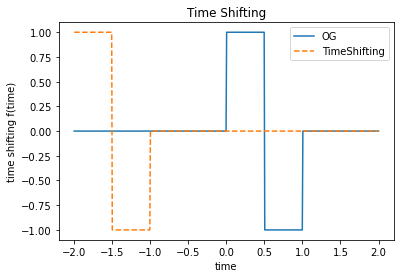

In [745]:
#Plotting Time Shifting
plt.plot(x,y, label="OG")
plt.plot(x, y_tsh, ls = "--",label= "TimeShifting")
plt.xlabel("time")
plt.ylabel("time shifting f(time)")
plt.title("Time Shifting")
plt.legend()
plt.show()

In [746]:
FFT_tsh_comp= np.fft.fft(y_tsh)

#Normalizing Time Shifting
FFT_ytshNM= abs(FFT_tsh_comp)/N

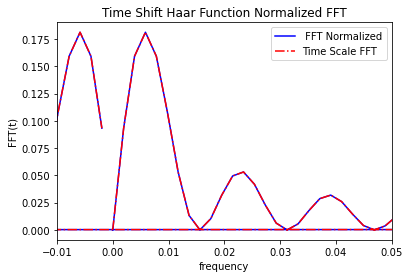

In [747]:
#Plotting Normalized timeshifting
plt.plot(f_x, FFT_xNM, color= "b", ls="-", label= " FFT Normalized")
plt.plot(f_x,FFT_ytshNM, color= "r", ls="-.",label= "Time Scale FFT ")
plt.xlim(-.01,.05)
plt.xlabel("frequency")
plt.ylabel("FFT(t)")
plt.title("Time Shift Haar Function Normalized FFT")
plt.legend()
plt.show()

In [748]:
#Part D------------------------------------
#Time scaling transforms our graph.

In [749]:
#Time Scaling
tsf_val= 5
y_tscl = []
for i in range(len(x)):
   y_tscl.append(f(x[i], tsf_val, 0))
y_tscl= np.array(y_tscl)

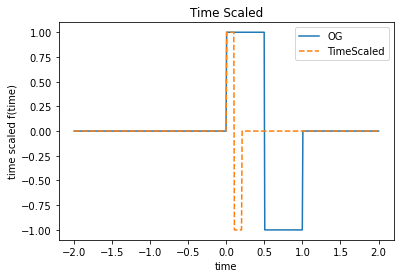

In [750]:
plt.plot(x,y, label="OG")
plt.plot(x, y_tscl, ls = "--",label= "TimeScaled")
plt.xlabel("time")
plt.ylabel("time scaled f(time)")
plt.title("Time Scaled")
plt.legend()
plt.show()

In [751]:
#Normalizing time scaling function
FFT_tscl_comp= np.fft.fft(y_tscl)

#Normalizing time scale
FFT_ytsclNM= abs(FFT_tscl_comp)/N


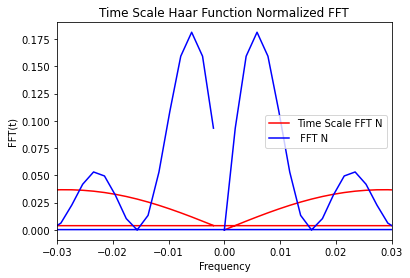

In [752]:
#Plotting Normalized Time Scaling Function
plt.plot(f_x,FFT_ytsclNM, color= "r", label= "Time Scale FFT N")
plt.plot(f_x,FFT_xNM, color= "b", label= " FFT N")
plt.xlim(-.03,.03)
plt.xlabel("Frequency")
plt.ylabel("FFT(t)")
plt.title("Time Scale Haar Function Normalized FFT")
plt.legend()
plt.show()